In [1]:
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Configurações de conexão com o banco de dados
db_config = {
    'host': 'dev-btime-db-001.postgres.database.azure.com',
    'database': 'pagila',
    'user': 'lucelena',
    'password': 'rLm6sa49R2qp'
}

try:
    connection = psycopg2.connect(**db_config)

    sql_query = """
        SELECT
            r.rental_id,
            r.rental_date,
            r.return_date,
            r.last_update,
            f.title AS film_title,
            i.inventory_id
        FROM rental r
        JOIN customer c ON r.customer_id = c.customer_id
        JOIN inventory i ON r.inventory_id = i.inventory_id
        JOIN film f ON i.film_id = f.film_id
    """

    df = pd.read_sql_query(sql_query, connection)

    print("Dados unificados das tabelas 'rental', 'film' e 'inventory' armazenados em df:")
    print(df)

except (Exception, psycopg2.Error) as error:
    print("Erro ao conectar ao PostgreSQL:", error)

finally:
    if connection:
        connection.close()

C:\Users\selen\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Dados unificados das tabelas 'rental', 'film' e 'inventory' armazenados em df:
       rental_id               rental_date               return_date  \
0              2 2022-05-24 21:54:33+00:00 2022-05-28 18:40:33+00:00   
1              3 2022-05-24 22:03:39+00:00 2022-06-01 21:12:39+00:00   
2              4 2022-05-24 22:04:41+00:00 2022-06-03 00:43:41+00:00   
3              5 2022-05-24 22:05:21+00:00 2022-06-02 03:33:21+00:00   
4              6 2022-05-24 22:08:07+00:00 2022-05-27 00:32:07+00:00   
...          ...                       ...                       ...   
16039      16046 2022-08-23 21:26:47+00:00 2022-08-27 17:02:47+00:00   
16040      16047 2022-08-23 21:42:48+00:00 2022-08-25 01:48:48+00:00   
16041      16048 2022-08-23 21:43:07+00:00 2022-08-31 20:33:07+00:00   
16042      16049 2022-08-23 21:50:12+00:00 2022-08-30 00:01:12+00:00   
16043          1 2022-05-24 21:53:30+00:00 2022-05-26 21:04:30+00:00   

                    last_update            film_title  i

In [3]:
df.head()

,rental_id,rental_date,return_date,last_update,film_title,inventory_id
0,2,2022-05-24 21:54:33+00:00,2022-05-28 18:40:33+00:00,2022-02-16 02:30:53+00:00,FREAKY POCUS,1525
1,3,2022-05-24 22:03:39+00:00,2022-06-01 21:12:39+00:00,2022-02-16 02:30:53+00:00,GRADUATE LORD,1711
2,4,2022-05-24 22:04:41+00:00,2022-06-03 00:43:41+00:00,2022-02-16 02:30:53+00:00,LOVE SUICIDES,2452
3,5,2022-05-24 22:05:21+00:00,2022-06-02 03:33:21+00:00,2022-02-16 02:30:53+00:00,IDOLS SNATCHERS,2079
4,6,2022-05-24 22:08:07+00:00,2022-05-27 00:32:07+00:00,2022-02-16 02:30:53+00:00,MYSTIC TRUMAN,2792


In [4]:
df["duration"] = df["return_date"] - df["rental_date"]

In [5]:
df.head()

,rental_id,rental_date,return_date,last_update,film_title,inventory_id,duration
0,2,2022-05-24 21:54:33+00:00,2022-05-28 18:40:33+00:00,2022-02-16 02:30:53+00:00,FREAKY POCUS,1525,3 days 20:46:00
1,3,2022-05-24 22:03:39+00:00,2022-06-01 21:12:39+00:00,2022-02-16 02:30:53+00:00,GRADUATE LORD,1711,7 days 23:09:00
2,4,2022-05-24 22:04:41+00:00,2022-06-03 00:43:41+00:00,2022-02-16 02:30:53+00:00,LOVE SUICIDES,2452,9 days 02:39:00
3,5,2022-05-24 22:05:21+00:00,2022-06-02 03:33:21+00:00,2022-02-16 02:30:53+00:00,IDOLS SNATCHERS,2079,8 days 05:28:00
4,6,2022-05-24 22:08:07+00:00,2022-05-27 00:32:07+00:00,2022-02-16 02:30:53+00:00,MYSTIC TRUMAN,2792,2 days 02:24:00


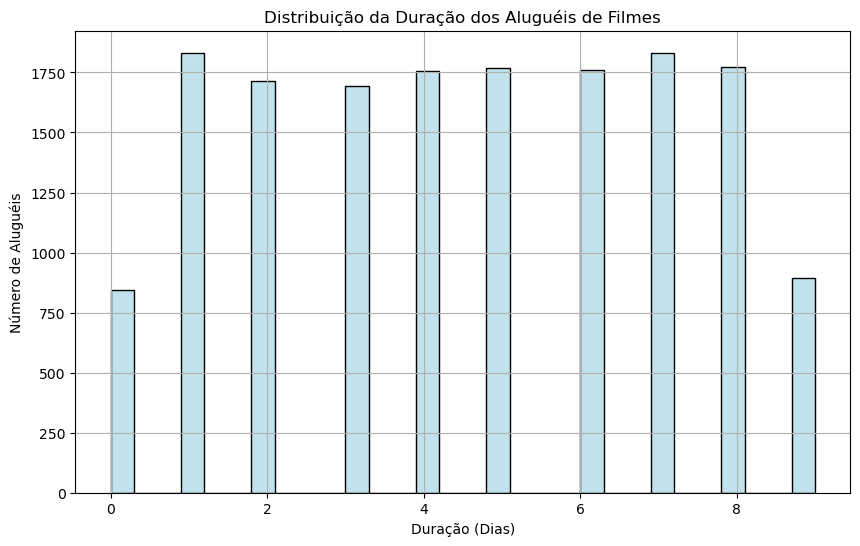

In [6]:
df["duration"] = pd.to_timedelta(df["duration"])

duration_distribution = df["duration"].dt.days 

plt.figure(figsize=(10, 6))
sns.histplot(duration_distribution, bins=30, kde=False, color='lightblue', edgecolor='k')  # Ajuste a cor para azul claro (lightblue)
plt.title('Distribuição da Duração dos Aluguéis de Filmes')
plt.xlabel('Duração (Dias)')
plt.ylabel('Número de Aluguéis')
plt.grid(True)

plt.show()

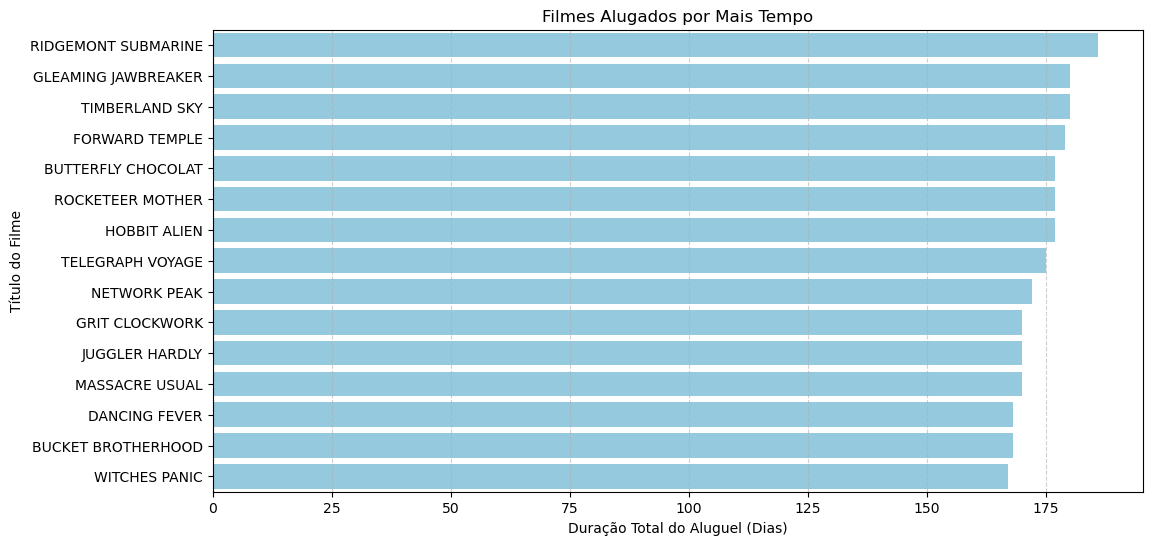

In [7]:
df["duration"] = pd.to_timedelta(df["duration"])

total_duration_por_filme = df.groupby("film_title")["duration"].sum()

top_15_filmes_por_duracao = total_duration_por_filme.sort_values(ascending=False).head(15)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_filmes_por_duracao.dt.days, y=top_15_filmes_por_duracao.index, color='skyblue')
plt.xlabel('Duração Total do Aluguel (Dias)')
plt.ylabel('Título do Filme')
plt.title('Filmes Alugados por Mais Tempo')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

In [8]:
df['rental_date'] = pd.to_datetime(df['rental_date'])

df['ano_mes'] = df['rental_date'].dt.strftime('%Y-%m')

tendencia_mensal = df.groupby('ano_mes')['rental_id'].count().reset_index()
tendencia_mensal

,ano_mes,rental_id
0,2022-02,182
1,2022-05,1156
2,2022-06,2311
3,2022-07,6739
4,2022-08,5656


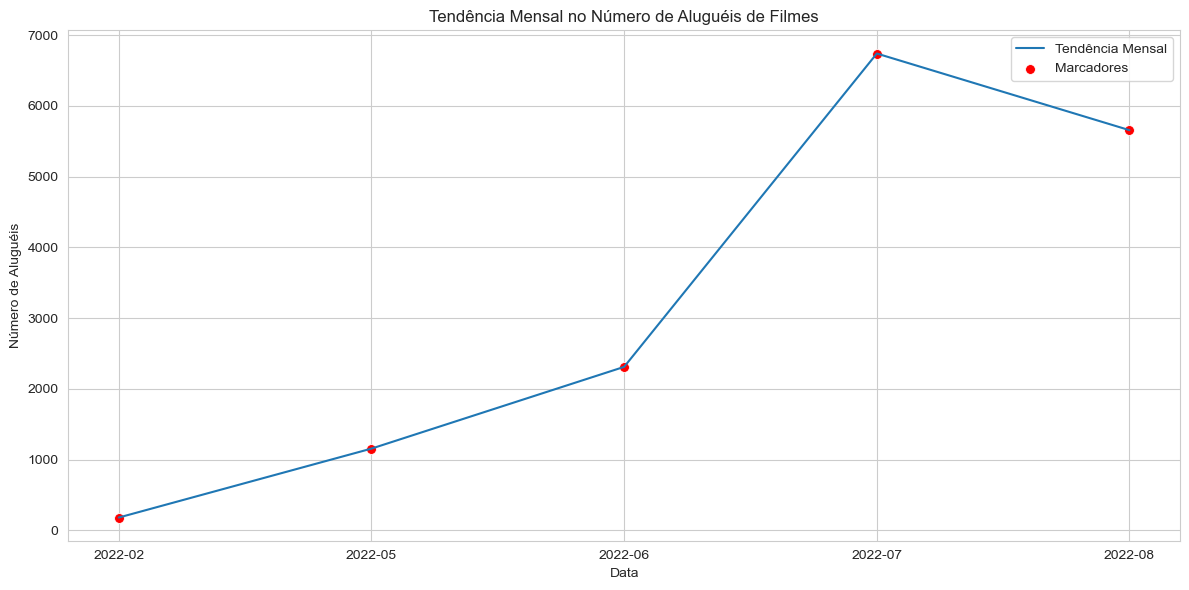

In [12]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=tendencia_mensal, x='ano_mes', y='rental_id', palette='viridis', label='Tendência Mensal')

sns.scatterplot(data=tendencia_mensal, x='ano_mes', y='rental_id', color='red', s=50, label='Marcadores')

plt.title('Tendência Mensal no Número de Aluguéis de Filmes')
plt.xlabel('Data')
plt.ylabel('Número de Aluguéis')
plt.legend()
plt.tight_layout()
plt.show()